In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [17]:
df.shape

(374, 13)

In [18]:
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [21]:
for colum in df.columns:
    print(f"{colum}: {df[colum].nunique()} unique values")

Person ID: 374 unique values
Gender: 2 unique values
Age: 31 unique values
Occupation: 11 unique values
Sleep Duration: 27 unique values
Quality of Sleep: 6 unique values
Physical Activity Level: 16 unique values
Stress Level: 6 unique values
BMI Category: 4 unique values
Blood Pressure: 25 unique values
Heart Rate: 19 unique values
Daily Steps: 20 unique values
Sleep Disorder: 2 unique values


In [23]:
print(f"{df['Stress Level'].value_counts().sort_index()}")
print(f"stress levels are in between {df['Stress Level'].min()} - {df['Stress Level'].max()} ")

Stress Level
3    71
4    70
5    67
6    46
7    50
8    70
Name: count, dtype: int64
stress levels are in between 3 - 8 


In [24]:
catagorical_col=[col for col in df.columns if df[col].dtype =='object']
numerical_col=[col for col in df.columns if df[col].dtype!='object']

print(f"catagorical_columns{catagorical_col}")
print(f"Numerical columns {numerical_col}")


catagorical_columns['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Numerical columns ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


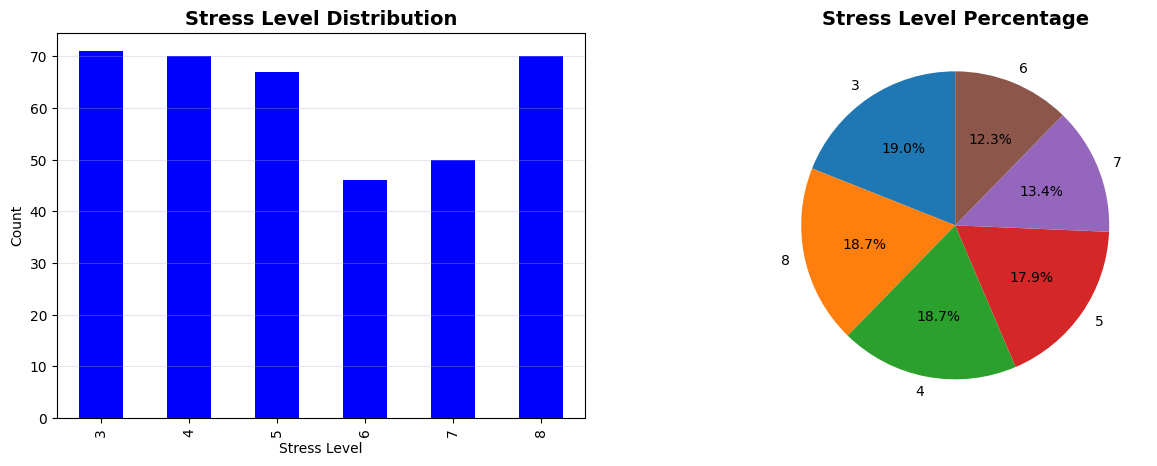

In [28]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
df['Stress Level'].value_counts().sort_index().plot(kind='bar',ax=axes[0],color='blue')
axes[0].set_title('Stress Level Distribution',fontsize=14,fontweight='bold')
axes[0].set_xlabel('Stress Level')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)


df['Stress Level'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Stress Level Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.show()


In [30]:
df[catagorical_col].nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [29]:
df[['high_bp', 'low_bp']] = df['Blood Pressure'].str.split('/', expand=True)

In [31]:
df=df.drop(columns=['Blood Pressure'])

In [32]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,high_bp,low_bp
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [33]:
df['high_bp']=pd.to_numeric(df['high_bp'],errors='coerce')
df['low_bp']=pd.to_numeric(df['low_bp'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  high_bp                  374 non-null    int64  
 13  low_bp                   374 non-null    int64  
dtypes: float64(1), int64(9), o

In [34]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(0)
df_1 = pd.get_dummies(df,columns=['Sleep Disorder'],drop_first=True)
df_1 = pd.get_dummies(df_1,columns=['Gender', 'Occupation', 'BMI Category'],drop_first=True)
df_1.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,high_bp,low_bp,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,False,True,False,False,False,True
1,2,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
2,3,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,False,False,False,False
3,4,28,5.9,4,30,8,85,3000,140,90,...,False,False,True,False,False,False,False,False,True,False
4,5,28,5.9,4,30,8,85,3000,140,90,...,False,False,True,False,False,False,False,False,True,False


In [35]:
correlations=df_1.corr()['Stress Level'].sort_values(ascending=False)
print(correlations)

Stress Level                       1.000000
Heart Rate                         0.670026
Gender_Male                        0.396018
Occupation_Doctor                  0.368038
Occupation_Salesperson             0.278757
Daily Steps                        0.186829
BMI Category_Overweight            0.157406
Sleep Disorder_Insomnia            0.139380
Occupation_Sales Representative    0.108196
high_bp                            0.102818
Occupation_Scientist               0.094753
low_bp                             0.091811
Sleep Disorder_Sleep Apnea         0.081582
Occupation_Nurse                   0.045274
Occupation_Software Engineer       0.036081
BMI Category_Obese                 0.029459
Occupation_Manager                -0.011250
BMI Category_Normal Weight        -0.026776
Physical Activity Level           -0.034134
Occupation_Lawyer                 -0.068714
Occupation_Teacher                -0.167945
Occupation_Engineer               -0.379980
Person ID                       